# w clipping notebook

In [2]:
import torch 
import h5py
import os 
import sys 
import json

import scipy.stats as stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep

sys.path.insert(0, "../src")
from plot_utils     import plot_ref_data, plot_ref_data_reco, plot_loss_history, plot_one_t, plot_two_t, plot_quantiles_evolution
from analysis_utils import compute_df, produce_bins, save_binning, load_binning, find_results, load_results, compute_t_from_loss
from nn_utils       import NPLMnetwork

## CONFIGURE
hep.style.use(hep.style.CMS)

In [3]:
OUTPUT_DIRECTORY = "../output/1D_w/"

# Plotting parameters
FONTSIZE  = 36
FIGSIZE_R = (14, 12)
FIGSIZE   = (14, 10)
PALETTE_1 = [
    "#1f77b4", # 0
    "#4876bf", # 1 
    "#6c74c5", # 2
    "#8f6fc6", # 3
    "#b067c0", # 4
    "#cd5fb4", # 5
    "#e657a3", # 6
    "#f9528d", # 7
    "#ff5474", # 8
    "#ff5d58", # 9
    "#ff6c3a", # 10
    "#ff7f0e", # 11
]
PALETTE_2 = [
    "#494B69", # 0
    "#695D7A", # 1
    "#9F5B72", # 2
    "#D8707C", # 3
    "#FDA85A", # 4
    "#FDCD5A", # 5
]
PALETTE_3 = [
    "midnightblue",   # 0
    "#1f78b4",        # 1
    "lightseagreen",  # 2
    "mediumseagreen", # 3
    "darkseagreen",   # 4
]

PLOT_PATH = "./plots/"
if not os.path.exists(PLOT_PATH):
    os.makedirs(PLOT_PATH)

### function for the KS compatibility test

In [4]:
def print_KS(input_path : str, out = False):
    '''
    input_path : path for the config json file you want to analyze
    '''
    json_files = [] # config json files paths
    ref_dirs = []   # directories for the files
    ref_losses_list = [];  ref_weights_list = []
    t_ref_distrib   = [];  w_clips  = []
    for folder in os.listdir(input_path):
        for ff in os.listdir(input_path+folder):
            for j in os.listdir(input_path+folder+"/"+ff):
                if j.endswith(".json"):
                    json_files.append(input_path+folder+"/"+ff+"/"+j)
    
    for path in json_files:
        with open(path) as f:
            config_json_ref = json.load(f)
            ref_dirs.append(config_json_ref["output_directory"])
            w_clips.append(config_json_ref["weight_clipping"])

    ref_losses_names   = find_results(ref_dirs[0], "losses.pth")
    ref_weights_names  = find_results(ref_dirs[0], "weights.pth")

    data = list(zip(w_clips, ref_dirs))
    sorted_data = sorted(data, key=lambda tup: tup[0])
    w_clips, ref_dirs = zip(*sorted_data)

    for dir in ref_dirs:
        l, w = load_results(dir, ref_losses_names, ref_weights_names)
        # ref_losses_list.append(compute_t_from_loss(l))
        t_ref_distrib.append(compute_t_from_loss(l[:,-1]))
        ref_weights_list.append(w)
    
    print("number of w clipping values: ", len(w_clips))
    print("w clipping values: ", w_clips)
    print("number of toys per value: ", len(ref_losses_names), "\n")

    ks_stat = []
    ks_p    = []

    for w in range(len(w_clips)):
        ks_statistic, ks_p_value = stats.kstest(t_ref_distrib[w], "chi2", args=(13,))
        ks_stat.append(ks_statistic) ; ks_p.append(ks_p_value)
        if out:
            print(f"KS Statistic for w={w_clips[w]} is : {ks_statistic}")
            print(f"P-value: {ks_p_value}\n")
    
    return w_clips, ks_stat, ks_p


## First search
rough scan of the value of w clipping in the range $w \in (5,10,15,20,25,30)$, by running 15 toys for each value

Text(0, 1, 'KS compatibility')

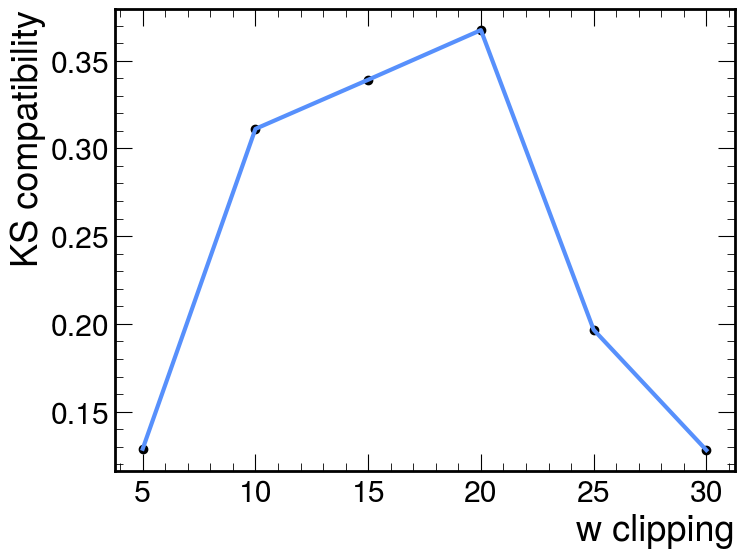

In [32]:
w_clip, first_KS, first_p = print_KS("/home/ubuntu/NPLM.torch/output/1D_w/first/", out=False)

plt.figure(figsize=(8,6))
plt.scatter(w_clip, first_KS, color='black')
plt.plot(w_clip, first_KS, lw=3)
plt.xlabel('w clipping')
plt.ylabel('KS compatibility')


## Second search
better scan of the value of w clipping by running 40 toys for each value

number of w clipping values:  17
w clipping values:  (4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 29.0, 29.5, 30.0, 30.5, 31.0, 31.5)
number of toys per value:  40 

KS Statistic for w=4.0 is : 0.18500575394854596
P-value: 0.11358711532503152

KS Statistic for w=4.5 is : 0.1770267818957182
P-value: 0.14418481903620795

KS Statistic for w=5.0 is : 0.11537012270388958
P-value: 0.6200292359223538

KS Statistic for w=5.5 is : 0.11802362726245752
P-value: 0.5917815013295727

KS Statistic for w=6.0 is : 0.09001088928260637
P-value: 0.8733666385558663

KS Statistic for w=6.5 is : 0.12025799629324438
P-value: 0.5682201035289027

KS Statistic for w=7.0 is : 0.07621034987522142
P-value: 0.9605210778163993

KS Statistic for w=7.5 is : 0.1618646242045514
P-value: 0.22023248981276633

KS Statistic for w=8.0 is : 0.24786536151015426
P-value: 0.011903503854026165

KS Statistic for w=8.5 is : 0.13779569111549433
P-value: 0.39715881857374213

KS Statistic for w=9.0 is : 0.11835533578952345
P

Text(0, 1, 'KS compatibility')

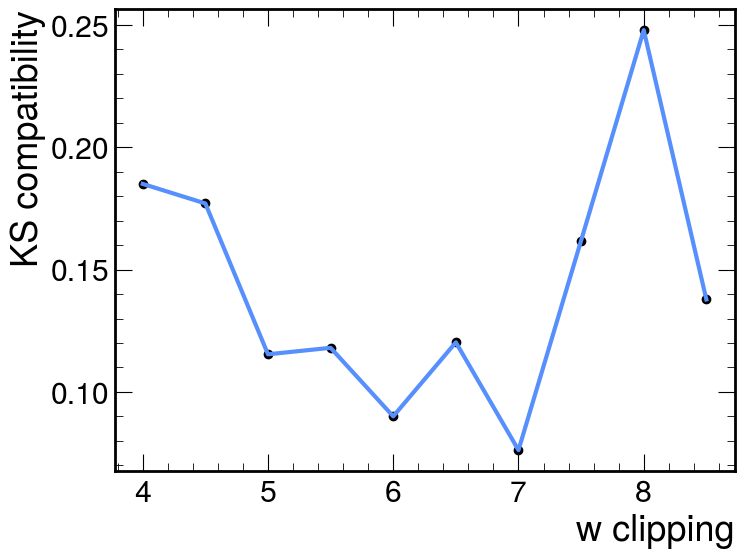

In [53]:
w_clip, first_KS, first_p = print_KS("/home/ubuntu/NPLM.torch/output/1D_w/second/1D/", out=False)
# print_KS("/home/ubuntu/NPLM.torch/output/1D_w/second/1D/", out=False)

plt.figure(figsize=(8,6))
plt.scatter(w_clip[:10], first_KS[:10], color='black')
plt.plot(w_clip[:10], first_KS[:10], lw=3)
plt.xlabel('w clipping')
plt.ylabel('KS compatibility')


## Third search
better scan of the value of w clipping by running 50 toys for each value

number of w clipping values:  9
w clipping values:  (6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3)
number of toys per value:  50 

KS Statistic for w=6.5 is : 0.10701663986352672
P-value: 0.5787081447535609

KS Statistic for w=6.6 is : 0.21662773021595905
P-value: 0.015381099754653516

KS Statistic for w=6.7 is : 0.13457710931427747
P-value: 0.2981143751259817

KS Statistic for w=6.8 is : 0.08939892183138354
P-value: 0.7859603518113266

KS Statistic for w=6.9 is : 0.09818325354057722
P-value: 0.684029330916142

KS Statistic for w=7.0 is : 0.1537309416067476
P-value: 0.16937552947969492

KS Statistic for w=7.1 is : 0.08666326296638704
P-value: 0.8156323089229263

KS Statistic for w=7.2 is : 0.11583823049904118
P-value: 0.4781687681578708

KS Statistic for w=7.3 is : 0.08276979520504191
P-value: 0.8551336683110273



Text(0, 1, 'KS compatibility')

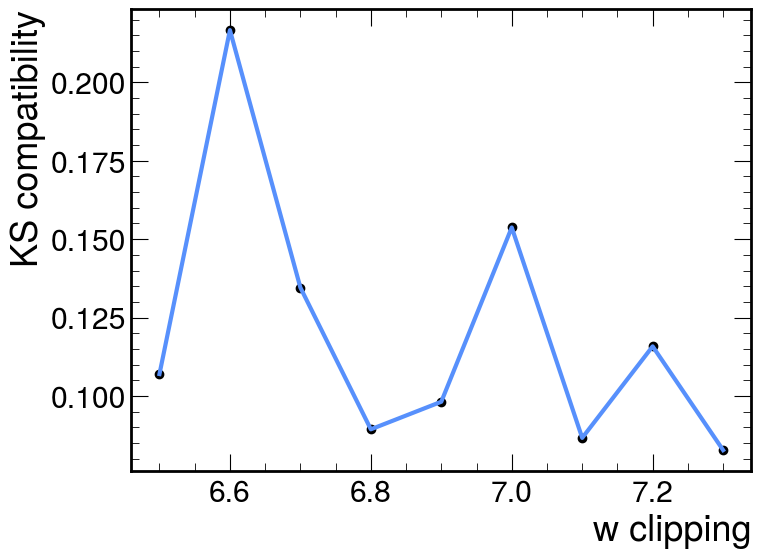

In [6]:
w_clip, first_KS, first_p = print_KS("/home/ubuntu/NPLM.torch/output/1D_w/third/1D/", out=True)

plt.figure(figsize=(8,6))
plt.scatter(w_clip, first_KS, color='black')
plt.plot(w_clip, first_KS, lw=3)
plt.xlabel('w clipping')
plt.ylabel('KS compatibility')


## repeat the grid search again 

number of w clipping values:  21
w clipping values:  (5.8, 6.0, 6.2, 6.4, 6.6, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6, 8.8, 9.0, 9.2, 9.4, 9.6)
number of toys per value:  30 



Text(0, 1, 'KS compatibility')

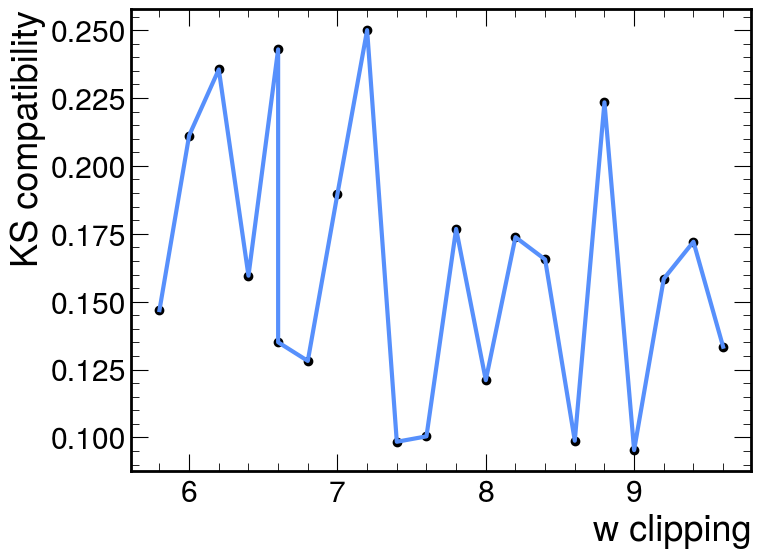

In [5]:
w_clip, first_KS, first_p = print_KS("/home/ubuntu/NPLM.torch/output/1D_w/fourth/1D/", out=False)

plt.figure(figsize=(8,6))
plt.scatter(w_clip, first_KS, color='black')
plt.plot(w_clip, first_KS, lw=3)
plt.xlabel('w clipping')
plt.ylabel('KS compatibility')


we should look better in the range near w=9 and between 7 and 8